In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import main as mn
import os
import importlib
importlib.reload(mn)

#file_path+= '\\Body.dat'
file_name = []
file_type = []
#data = mn.open_file(file_path)

In [4]:
# Chemin du dossier contenant les dossiers à parcourir
chemin_dossier_parent = 'C:\\Users\\karel\\Desktop\\ponts paris\\3A\\robot_control\\hands_on_2\\anm_scaled'

# Parcourir tous les dossiers dans le dossier parent
for nom_dossier in os.listdir(chemin_dossier_parent):
    chemin_dossier = os.path.join(chemin_dossier_parent, nom_dossier)
    if os.path.isdir(chemin_dossier):
        print("Nom du dossier :", nom_dossier)
        file_name.append(nom_dossier)
        if 'JOE' in nom_dossier:
            file_type.append('pink')
        elif 'COE' in nom_dossier:
            file_type.append('red')
        elif 'TRE' in nom_dossier:
            file_type.append('black')
        elif 'NEE' in nom_dossier:
            file_type.append('green')
auto_correl_matrix = []
for i in range(len(file_name)):
    auto_correl_matrix.append(mn.auto_correl_matrix_from_beginning(chemin_dossier_parent+'\\' +file_name[i]))


Nom du dossier : EMLACOE01.4
Nom du dossier : EMLACOE02.4
Nom du dossier : EMLACOE03.4
Nom du dossier : EMLACOE04.4
Nom du dossier : EMLACOE05.4
Nom du dossier : EMLAJOE01.4
Nom du dossier : EMLAJOE02.4
Nom du dossier : EMLAJOE03.4
Nom du dossier : EMLAJOE04.4
Nom du dossier : EMLAJOE05.4
Nom du dossier : EMLANEE01.4
Nom du dossier : EMLANEE02.4
Nom du dossier : EMLANEE03.4
Nom du dossier : EMLANEE04.4
Nom du dossier : EMLANEE05.4
Nom du dossier : EMLATRE01.4
Nom du dossier : EMLATRE02.4
Nom du dossier : EMLATRE03.4
Nom du dossier : EMLATRE04.4
Nom du dossier : EMLATRE05.4
Nom du dossier : NABACOE01.4
Nom du dossier : NABACOE02.4
Nom du dossier : NABACOE03.4
Nom du dossier : NABACOE04.4
Nom du dossier : NABACOE05.4
Nom du dossier : NABAJOE01.4
Nom du dossier : NABAJOE02.4
Nom du dossier : NABAJOE03.4
Nom du dossier : NABAJOE04.4
Nom du dossier : NABAJOE05.4
Nom du dossier : NABANEE01.4
Nom du dossier : NABANEE02.4
Nom du dossier : NABANEE03.4
Nom du dossier : NABANEE04.4
Nom du dossier

In [5]:
from sklearn.preprocessing import StandardScaler
auto_correl_matrix = np.array(auto_correl_matrix)
auto_correl_matrix = auto_correl_matrix.reshape(80,144)
#x = StandardScaler().fit_transform(auto_correl_matrix)
print(auto_correl_matrix)



[[ 1.57740134e-01  8.53293599e-02 -7.61739303e-01 ...  3.15706806e+01
  -5.79319809e+00  5.01559767e+01]
 [ 3.00375533e-01 -2.88503681e-02  1.11276093e+00 ...  4.80747932e+01
  -8.41728037e+00  8.45120402e+01]
 [ 4.70260513e-01 -1.24661318e-02 -3.26368593e+00 ...  4.79599702e+01
  -6.91512507e+00  7.23060939e+01]
 ...
 [ 1.50715628e-01 -5.21484706e-02 -4.05984010e-01 ...  6.50534440e+00
  -2.62692566e+00  1.01467835e+01]
 [ 1.93354621e-01 -5.29920050e-02 -5.25020580e-01 ...  6.53406310e+00
  -1.85616840e+00  8.88368858e+00]
 [ 1.34804321e-01 -3.96821350e-02 -2.03265782e-01 ...  4.88500691e+00
  -1.52049717e+00  6.82522459e+00]]


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Vous pouvez ajuster le nombre de composantes principales en fonction de vos besoins

# Effectuer l'analyse PCA sur vos données
x = StandardScaler().fit_transform(auto_correl_matrix)
donnees_pca = pca.fit_transform(auto_correl_matrix)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


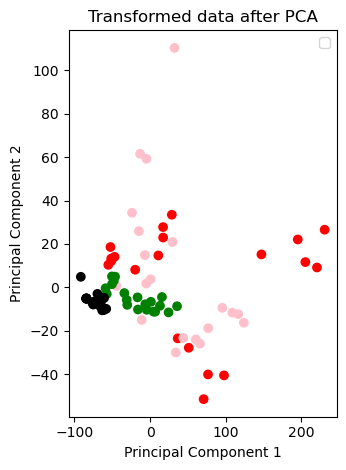

In [91]:
# Tracé des données transformées
plt.subplot(1, 2, 2)
plt.scatter(donnees_pca[:, 0], donnees_pca[:, 1], c=file_type)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Transformed data after PCA')

plt.legend()
plt.tight_layout()
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
y = file_type
X = auto_correl_matrix

# Encoder la variable cible (catégorielle)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normaliser ou standardiser les données si nécessaire
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(X_train)


[[ 0.43623961  0.50304468  0.22563846 ... -0.82549825  0.80440365
  -0.70686715]
 [-0.18918799  0.46674216  0.20692706 ... -1.00638701  0.74604902
  -1.06031326]
 [ 1.29678689  0.61902259  1.2967537  ... -0.04443565  1.00206485
  -0.02663564]
 ...
 [-1.46369368  0.2100701  -0.81966504 ... -0.22151294 -0.97500226
  -0.20443075]
 [ 0.80214469 -2.26004518  1.54821714 ... -0.73007138  0.74980611
  -0.80972081]
 [ 1.17418663  0.47160319 -1.67382868 ...  0.86505355 -2.06590429
   0.93571054]]


In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Créer le modèle KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Entraîner le modèle
knn.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_knn = knn.predict(X_test)

# Évaluer le modèle
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7083333333333334
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.33      1.00      0.50         3
           2       1.00      0.50      0.67        10
           3       1.00      0.71      0.83         7

    accuracy                           0.71        24
   macro avg       0.78      0.80      0.72        24
weighted avg       0.88      0.71      0.73        24



In [62]:
from sklearn.ensemble import RandomForestClassifier

# Créer le modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_rf = rf.predict(X_test)

# Évaluer le modèle
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8333333333333334
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.43      1.00      0.60         3
           2       1.00      0.60      0.75        10
           3       1.00      1.00      1.00         7

    accuracy                           0.83        24
   macro avg       0.86      0.90      0.84        24
weighted avg       0.93      0.83      0.85        24



In [98]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


cv = sklearn.model_selection.KFold(n_splits = 10, shuffle=True, random_state=42)
# Créer les modèles
svm = SVC(kernel='linear', random_state=42)
log_reg = LogisticRegression(random_state=42, max_iter=10000)
naive_bayes = GaussianNB()
gradient_boost = GradientBoostingClassifier(random_state=42)

# Effectuer la validation croisée
cv_scores_svm = cross_val_score(svm, X, y, cv=cv)  # 5-fold cross-validation
cv_scores_log_reg = cross_val_score(log_reg, X, y, cv=cv)  # 5-fold cross-validation
cv_scores_naive_bayes = cross_val_score(naive_bayes, X, y, cv=cv)  # 5-fold cross-validation
cv_scores_gradient_boost = cross_val_score(gradient_boost, X, y, cv=cv)  # 5-fold cross-validation

# Afficher les résultats
print("SVM Cross-Validation Scores:", cv_scores_svm)
print("SVM Mean Accuracy:", np.mean(cv_scores_svm))
print("Logistic Regression Cross-Validation Scores:", cv_scores_log_reg)
print("Logistic Regression Mean Accuracy:", np.mean(cv_scores_log_reg))
print("Naive Bayes Cross-Validation Scores:", cv_scores_naive_bayes)
print("Naive Bayes Mean Accuracy:", np.mean(cv_scores_naive_bayes))
print("Gradient Boosting Cross-Validation Scores:", cv_scores_gradient_boost)
print("Gradient Boosting Mean Accuracy:", np.mean(cv_scores_gradient_boost))

SVM Cross-Validation Scores: [0.75  0.75  0.875 1.    0.875 1.    0.75  0.875 0.75  0.75 ]
SVM Mean Accuracy: 0.8375
Logistic Regression Cross-Validation Scores: [0.625 0.875 0.75  0.875 0.75  1.    1.    0.875 1.    0.875]
Logistic Regression Mean Accuracy: 0.8625
Naive Bayes Cross-Validation Scores: [0.875 0.625 0.875 1.    1.    1.    1.    0.875 0.625 0.875]
Naive Bayes Mean Accuracy: 0.875
Gradient Boosting Cross-Validation Scores: [0.75  0.75  0.75  0.75  0.75  0.875 0.875 0.75  0.5   1.   ]
Gradient Boosting Mean Accuracy: 0.775


In [100]:
from sklearn.model_selection import cross_val_score
cv_scores_knn = cross_val_score(knn, X, y, cv=cv)  # 5-fold cross-validation
cv_scores_rf = cross_val_score(rf, X, y, cv=cv)    # 5-fold cross-validation



# Afficher les résultats
print("KNN Cross-Validation Scores:", cv_scores_knn)
print("KNN Mean Accuracy:", np.mean(cv_scores_knn))
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("Random Forest Mean Accuracy:", np.mean(cv_scores_rf))




KNN Cross-Validation Scores: [0.5   0.75  0.75  1.    0.75  0.875 0.875 0.875 0.75  0.625]
KNN Mean Accuracy: 0.775
Random Forest Cross-Validation Scores: [0.875 0.875 0.75  1.    0.75  0.875 0.875 1.    1.    0.75 ]
Random Forest Mean Accuracy: 0.875


In [101]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayesian": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Perform cross-validation and collect mean scores
mean_scores = {}
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=cv)
    mean_scores[clf_name] = scores.mean()
print(mean_scores)
# Plot bar chart
plt.figure(figsize=(12, 8))
plt.bar(mean_scores.keys(), mean_scores.values(), color='skyblue')
plt.ylabel('Mean Cross-validated Score')
plt.title('Mean Cross-validated Scores for Different ML Techniques')
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 1])  # Adjust the y-axis limits if needed
plt.show()

KeyboardInterrupt: 

{'Logistic Regression': 0.8625, 'K-Nearest Neighbors': 0.7375, 'Random Forest': 0.875, 'Support Vector Machine': 0.875, 'Naive Bayesian': 0.85, 'Gradient Boosting': 0.8125}


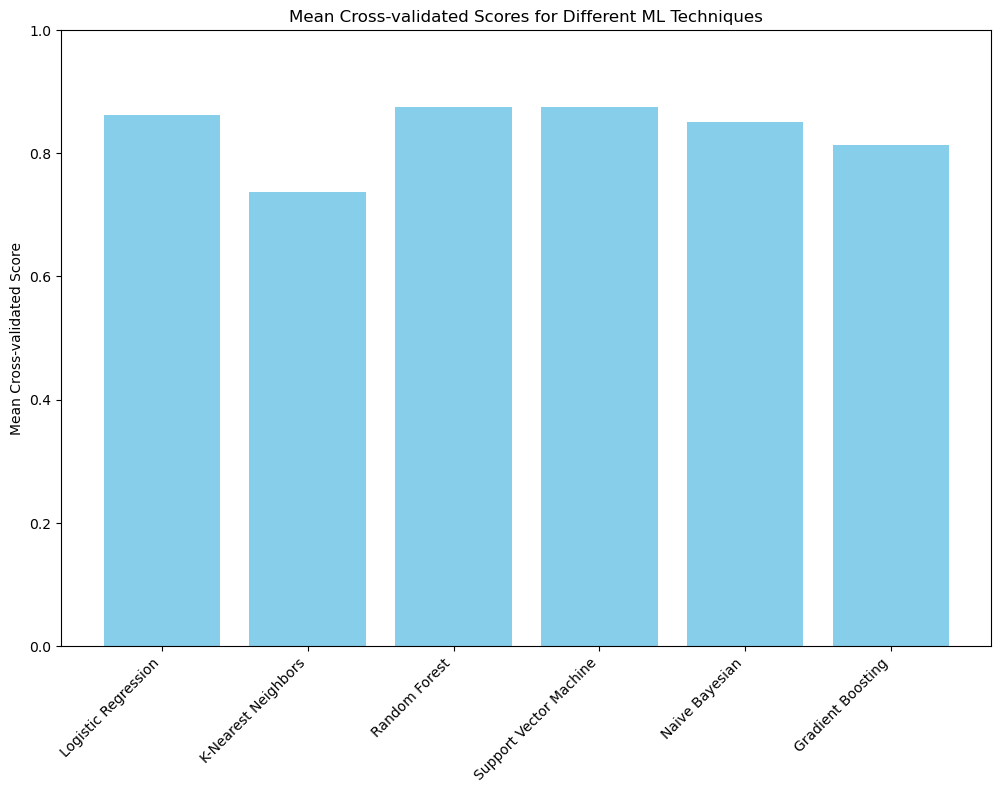

In [102]:
print(mean_scores)
# Plot bar chart
plt.figure(figsize=(12, 8))
plt.bar(mean_scores.keys(), mean_scores.values(), color='skyblue')
plt.ylabel('Mean Cross-validated Score')
plt.title('Mean Cross-validated Scores for Different ML Techniques')
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 1])  # Adjust the y-axis limits if needed
plt.show()